In [1]:
### <font color='#d50283'>Funciones:</font> 
#-----

In [2]:
#+ Cargar las librerías y fichero.

In [3]:
#Cuerpo

# librerías necesarias para realizar este estudio.
#librerías generales
import pandas as pd
import numpy as np
import math

#librerías escalar,normalizar,estimadores, etc...
# Creamos el PCA.
#import sklearn
#from sklearn.pipeline import Pipeline
#from sklearn.compose import ColumnTransformer
#from sklearn.decomposition import PCA
#from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
#from sklearn.compose import make_column_selector
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression,LogisticRegressionCV,RidgeClassifier,RidgeClassifierCV
#from sklearn.model_selection import RepeatedStratifiedKFold,validation_curve
#from sklearn.model_selection import GridSearchCV
#from pycaret.classification import * 
#from sklearn.metrics import f1_score, confusion_matrix,precision_score, auc,roc_curve ,accuracy_score,recall_score,roc_auc_score
#from sklearn.metrics import classification_report
#from sklearn import metrics
#from sklearn.model_selection import RepeatedKFold,learning_curve,cross_val_score
#from sklearn.metrics import matthews_corrcoef
#from imblearn.under_sampling import RandomUnderSampler
#from imblearn.over_sampling import RandomOverSampler
#from imblearn.combine import SMOTETomek
#from imblearn.ensemble import BalancedBaggingClassifier
#import joblib
#from collections import Counter



#librerías EDA
#from scipy.stats import shapiro,pearsonr,normaltest,anderson,boxcox
#from scipy import stats

#librerías escritura
from colorama import init, Fore, Back, Style
import json

#librerías gráficos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import colors
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from yellowbrick.classifier import ROCAUC
from PIL import Image
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import signal
import sys
import os
from IPython.display import Image,display, HTML
# Carga de imagenes
imagenMaster=Image(url='Imagenes/Business Analytics.png', width=1000)
imagenUni=Image(url='Imagenes/Imagen UPC.png', width=300, height=400)

# Configuration
from sklearn import set_config
%matplotlib inline
set_config(display='diagram')

import warnings
warnings.filterwarnings('ignore')


# Carga del Dataset
#Variables genéricas:
path=r'C:\Users\Nitropc\Proyecto UPC Business Analytics\Datos\Airbnb_Data.csv'#

#Cuerpo 
data = pd.read_csv(path,sep=',',encoding='latin-1')
dataEDA = data.copy()
#Definir Colores
color_palette = colors.qualitative.Plotly
cols = px.colors.DEFAULT_PLOTLY_COLORS
colors= color_palette

# Ocultar el código
from IPython.display import display, Markdown
#display(Markdown("Your markdown text"))


In [4]:
#+ Funciones gráficas.

In [5]:

def dibujartabla(title, df, ValorTransponer):
    
    # Calcular el porcentaje de cada valor en las columnas
    porcentaje_df = df.apply(lambda x: x / x.sum() * 100, axis=0).round(2)
    porcentaje_df = porcentaje_df.astype(str) + '%'
    
    if ValorTransponer == 1 :
            df_t = df.transpose() 
            header_values = ['Nombre Atributo'] + df_t.columns.tolist()  # Agregar encabezados de columnas con 'Atributo'
            cell_values = [df_t.index] + [df_t[col].values for col in df_t.columns]  # Agregar los nombres de las columnas originales como filas
            porcentaje_values = [['%'] + porcentaje_t[col].values.tolist() for col in porcentaje_t.columns]
    else:        
        max_widths = [max([len(str(value)) for value in df[column]])+3 for column in df.columns]
        header_values = list(df.columns)
        cell_values = df.transpose().values.tolist()
        
    # Crear la figura de la tabla usando plotly.graph_objects
    fig = go.Figure(data=[go.Table(
        header=dict(
            values=header_values,
            align='left',
            font=dict(size=14),
            height=40
        ),
        cells=dict(
            values=cell_values,
            align='left',
            font_size=12,
            height=30
        )
    )])
    
    fig.update_layout(title =  title, 
                      title_font_size = 20, title_x = 0.5)
    fig.show()

In [6]:
def crearhistograma(df, columnas):

    num_cols = len(columnas)
    rows = (num_cols // 3) + 1 if num_cols % 3 != 0 else num_cols // 3
    cols = 3

    # Crear subplots
    fig = make_subplots(rows=rows, cols=cols, subplot_titles=columnas)

    for idx, col in enumerate(columnas):
        row = (idx // cols) + 1
        col_num = (idx % cols) + 1

        # Crear el histograma
        hist = px.histogram(df, x=col, nbins=20, title=col, color=col)
        
        # Añadir el histograma a los subplots
        for trace in hist.data:
            fig.add_trace(trace, row=row, col=col_num)

        # Ordenar el eje x
        fig.update_xaxes(categoryorder='category ascending', row=row, col=col_num)



    # Actualizar el layout
    fig.update_layout(
        height=rows*300,  # Ajustar altura según la cantidad de filas
        width=1000,
        title_text=f"Histogramas de las siguientes columnas: ",
        showlegend=False
    )

    # Ajustar títulos de los ejes
    for idx, col in enumerate(columnas):
        fig['layout']['annotations'][idx]['font'] = dict(size=14)

    fig.show()

In [7]:
def dibujarhistograma(df, atributo, titulo, ancho, alto):
    # Obtener los valores únicos y sus frecuencias
    valores, frecuencias = df[atributo].value_counts().index, df[atributo].value_counts().values

    # Calcular los porcentajes
    total = frecuencias.sum()
    porcentajes = (frecuencias / total * 100).round(2)

    # Crear la tabla con atributo, frecuencia y porcentaje
    tabla = pd.DataFrame({atributo: valores, 'Frecuencia': frecuencias, 'Porcentaje (%)': porcentajes})

    # Definir la paleta de colores
    color_palette = px.colors.qualitative.Plotly

    # Lista de colores de la paleta
    cols = color_palette[:len(valores)]

    # Crear el diccionario para Plotly
    plotly_data = {
        'data': [
            {
                'type': 'bar',
                'x': valores,
                'y': frecuencias,
                'text': [f"{frec} ({pct}%)" for frec, pct in zip(frecuencias, porcentajes)],  # Texto para mostrar en cada barra#'text': frecuencias,  # Texto para mostrar en cada barra
                'textposition': 'outside',  # Posición del texto (fuera de la barra)
                'orientation': 'v',  # Orientación vertical
                'name': 'Frecuencia',  # Nombre de la serie para la leyenda
                'marker': {'color': cols}  # Colores de la paleta
            }
        ],
        'layout': {
            'title': f'Distribución del atributo {titulo}',
            'xaxis': {
                'title': atributo
            },
            'yaxis': {
                'title': 'Frecuencia'
            },
            'width': ancho,  # Ancho del gráfico
            'height': alto,  # Altura del gráfico
            'legend': {'orientation': 'h', 'y': 1.1},  # Posición de la leyenda y orientación horizontal
        }
    }

    # Crear la figura desde el diccionario
    fig = go.Figure(data=plotly_data['data'], layout=plotly_data['layout'])

    # Mostrar el gráfico y la tabla
    fig.show()
    return(tabla)

In [8]:
def histograma_target (df,atributo,target,titulo):
    
    # Calcular la media de log_price por atributo y ordenar de mayor a menor
    df_grouped = df.groupby(f"{atributo}")[f"{target}"].mean().reset_index()
    df_grouped = df_grouped.sort_values(by=f"{target}", ascending=False)

    fig = px.histogram(
        df_grouped, 
        x=f"{atributo}", 
        y=f"{target}", 
        histfunc="avg", 
        #nbins=20,
        text_auto=True, 
        color=f"{atributo}",
        title=f'{titulo}'
    )
    

    # Calcular la media global de log_price
    mean_log_price = df[f"{target}"].mean()

    # Añadir una línea de tendencia que represente la media global de log_price
    fig.add_shape(
        type="line",
        x0=-0.5,  # Ajusta según el rango de tu eje x
        x1=len(df_grouped[f"{atributo}"].unique()) - 0.5,  # Ajusta según el número de categorías
        y0=mean_log_price,
        y1=mean_log_price,
        line=dict(color="Red", width=2, dash="dash"),
        xref="x",
        yref="y"
    )

    # Añadir anotación para la media global
    fig.add_annotation(
        x=len(df_grouped[f"{atributo}"].unique()) - 0.5,  # Ajusta para colocar la anotación al final del eje x
        y=mean_log_price,
        text=f'<b><b>Media global: {mean_log_price:.2f}</b></b>',#f'Media global:{mean_log_price:.2f}',
        showarrow=True,
        arrowhead=2,
        ax=0,
        ay=-40
    )

    # Mostrar el gráfico
    fig.show()

In [9]:
def contar_frecuencia_amenities(df, top_n):
    frequency = {}
    for index, row in df.iterrows():
        amenities = row['servicios'].replace('{', '').replace('}', '').split(',')
        for amenity in amenities:
            amenity = amenity.strip('"')
            if amenity in frequency:
                frequency[amenity] += 1
            else:
                frequency[amenity] = 1
    # Obtener las características más frecuentes
    top_features = sorted(frequency, key=frequency.get, reverse=True)[:top_n]
    top_frequency = {k: frequency[k] for k in top_features}
    return top_frequency

In [10]:
def contar_frecuencia_neighbourhood(df, top_n):
    frequency = df['neighbourhood_city'].value_counts().to_dict()
    top_neighbourhood = dict(sorted(frequency.items(), key=lambda item: item[1], reverse=True)[:top_n])
    return top_neighbourhood

In [11]:
def EstaDescrip(num):
    #Añadimos describe
    df = num.describe().T
    #Añadimos la mediana
    df['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    df = df.iloc[:,[0,1,8,2,3,4,5,6,7]]

    return(df)

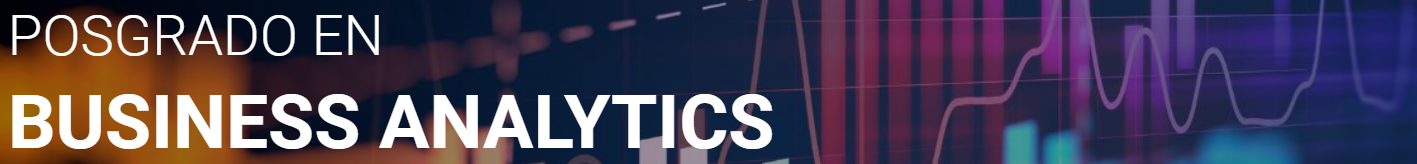

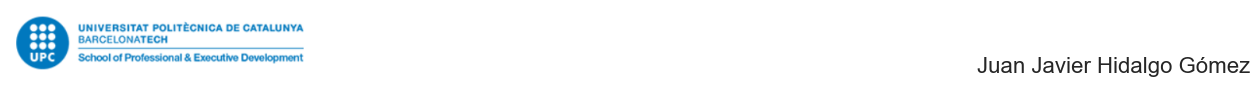

In [12]:
import matplotlib.pyplot as plt

# Cargar la imagen

imagen = plt.imread("C:/Users/Nitropc/Proyecto UPC Business Analytics/imagenes/Imagen UPC.png")

# Crear una figura con una subparcela
fig, ax = plt.subplots(figsize=(4,2))  # Ajustar el tamaño de la figura según lo necesites

# Mostrar la imagen
ax.imshow(imagen)
ax.axis('off') # Desactivar los ejes

# Definir el nombre
nombre = "Juan Javier Hidalgo Gómez"

# Agregar el texto debajo de la imagen y a la derecha
plt.text(4, -0.1, nombre, fontsize=16, ha='right', va='bottom', transform=ax.transAxes)

plt.show()









### <font color='#d50283'>Indice general</font>
-----
<ul style="list-style-type:none">
<li> <a href='#Índice'>Índice </a> </li>
<li> <a href='#Introducción.'>Introducción</a> </li>
<li> <a href='#Objetivo'>Objetivo.</a> </li>
<li> <a href='#1.-Metodología.'>1. Metodología</a> </li>
    <ul style="list-style-type:none">
<li> <a href='#1.1-Descripción-del-DataSet.'> 1.1 Descripción del Dataset</a> </li>
<li> <a href='#1.1.1-Descripción-tipos-de-Atributos.'>1.1.1 Descripción tipos de Atributos.</a> </li>
<li> <a href='#1.2-Lectura-y-visualización-de-los-datos.'>1.2 Lectura y visualización de los datos.</a> </li>
<li> <a href='#1.3-Análisis-de-los-datos.'>1.3 Análisis de los datos.</a> </li>
<li> <a href='#1.4-Análisis-descriptivo-de-los-datos.'>1.4 Análisis descriptivo de los datos.</a> </li>
<li> <a href='#1.4.1-Análisis-Descriptivo-de-Datos-Categóricos.'>1.4.1 Análisis Descriptivo de Datos Categóricos.</a> </li>
<li> <a href='#1.4.2-Análisis-Descriptivo-de-Datos-Categóricos-en-función-del-target.'>1.4.2 Análisis Descriptivo de Datos Categóricos en función del target.</a> </li>
<li> <a href='#1.4.3-Análisis-Descriptivo-de-Datos-discretos-y-continuos.'>1.4.3 Análisis Descriptivo de Datos discretos y continuos.</a> </li>
<li> <a href="#1.5-Análisis-Serie-Temporal.">1.5 Análisis Serie Temporal.</a> </li>
        <ul style="list-style-type:none">
    </ul>
</ul>
        <ul style="list-style-type:none">
    </ul>
<li> <a href='#Conclusiones'>Conclusiones</a> </li>
<li> <a href='#Bibliografía'>Bibliografía</a> </li>
</ul>
    

### <font color='#d50283'>Introducción.</font> 
-----  

En este trabajo fin de curso se pretende poner en práctica los conocimientos y técnicas
aprendidas en el transcurso del curso PosGrado Business Analytics mediante su aplicación
práctica en un conjunto de datos públicos.  
Me planteo dos objetivos principales: por una parte consolidar el uso de las técnicas y
la interpretación de los resultados y por otro desarrollar las habilidades necesarias que permiten
la aplicación de estas herramientas en el mundo real y en casos reales de negocio.  
Entiendo este segundo objetivo como la constatación efectiva del aprovechamiento de los conocimientos
adquiridos. Más allá la amplitud de conocimientos y destreza en el uso de técnicas y
métodos en el ámbito del Business Analytics, éstos no son más que el medio para permitirnos
conocer mejor el escenario en el que desarrollamos nuestra actividad y ofrecer una toma de
decisiones adecuada a los objetivos marcados en el negocio.  
Dividiremos este documento en varias partes. En el apartado de metodología comentaremos cuál ha sido el origen de datos, una breve
descripción sobre el conjunto de datos escogido y las preparaciones básicas realizadas para favorecer
su posterior tratamiento y análisis que haremos.  
La parte de preparación de datos realizará un recorrido exhaustivo por los diferentes atributos analizando
su contenido y distribución y haciendo, en su caso, adecuaciones para evitar influencias no deseadas
en los análisis posteriores.   


### <font color='#d50283'>Objetivo</font>
-----

Los principales objetivos de este proyecto son los siguientes:
    
+ **Desarrollar un modelo de Machine Learning** con la técnica de aprendizaje supervizado, que pueda predecir a partir de una serie de datos de entrada el precio del alojamiento de Airbnb.    
+ **Estudiar y analizar** los datos de nuestro DataSet.  La creación de nuestro modelo de ML, así como las herramientas necesarias para su elaborar y optimizar el mismo.
+ **Definir** una serie de pruebas con diferentes módelos de aprendizaje supervisado, para encontrar el más idóneo.
+ **Estudio de Análisis de Sentimiento** .
 
 

<ul style="list-style-type:none">
<li> <a href='#Indice-general'>Volver Índice general</a> </li>
</ul>

### <font color='#d50283'>1. Metodología.</font>
-----

Este capitulo incluye el estudio de los atributos de nuestro Dataset, lectura, visualización y descripción.

#### <font color='#d50283'>1.1 Descripción del DataSet.</font>

Airbnb es una plataforma en línea que permite a las personas alquilar alojamiento a corto plazo. Esto abarca desde personas comunes con una habitación disponible hasta empresas de gestión de propiedades que alquilan múltiples inmuebles. Por un lado, Airbnb permite a los propietarios listar su espacio y ganar dinero por el alquiler. Por otro lado, proporciona a los viajeros un acceso fácil al alquiler de hogares privados.

Airbnb recibe comisiones de dos fuentes por cada reserva, a saber, de los anfitriones y los huéspedes. Por cada reserva, Airbnb cobra al huésped un 6-12% del costo de la reserva. Además, Airbnb cobra al anfitrión un 3% por cada transacción exitosa.

El ejercicio que acometemos es desarrollar un modelo de precios que pueda predecir de manera efectiva el alquiler de un alojamiento y que pueda ayudar a los anfitriones, viajeros y también a la empresa a diseñar estrategias rentables.

+ **Fichero Airbnb_Data.csv:**  
    
**id :** Edad del paciente.   
    
**log_price :** Precio del alojamiento, eL precio viene transformado a logaritmo.  
    
**property_type :** Tipo de propiedad seleccionada, es un array 
    
- **['Apartment','House','Condominium','Loft','Townhouse','Hostel','Guest suite','Bed & Breakfast','Bungalow','Guesthouse','Dorm','Other','Camper/RV','Villa','Boutique hotel','Timeshare','In-law','Boat','Serviced apartment','Castle','Cabin','Treehouse','Tipi','Vacation home','Tent','Hut','Casa particular','Chalet','Yurt','Earth House','Parking Space','Train','Cave','Lighthouse','Island']**
    
**room_type :** Tipo de Habitación.

- **['Entire home/apt', 'Private room', 'Shared room']**
    
**amenities :** Servicios.  

- Json []
    
**accommodates :** Capacidad máxima del alojamiento.   
    
**bathrooms :** El número de baños en el alojamiento.   

**bed_type :** Tipo de cama(s).   
- **['Real Bed', 'Futon', 'Pull-out Sofa', 'Couch', 'Airbed']**
    
**cancellacion_policy :** Politica de cancelación.
    
- **['strict', 'moderate', 'flexible', 'super_strict_30', 'super_strict_60']**
    
**cleaning_fee :** Tarifa de limpieza.     
    
**city :**  Ciudad.   

- **['NYC', 'SF', 'DC', 'LA', 'Chicago', 'Boston']**
    
**descripcion :** Descripción detallada del alojamiento.     
    
**first_review :** Fecha de la primera opinión.   
    
**host_has_profile_pic :** Foto.       
    
**host_identity_verified :** Identidad Verificada.   

**host_response_rate :** Tasa de respuesta del anfitrión.
    
**host_since :** Fecha en que se creó el anfitrión/usuario.     
    
**instant_bookable :**  Si el huésped puede reservar automáticamente el alojamiento sin que el anfitrión necesite aceptar su solicitud de reserva. Un indicador de un alojamiento comercial.   
    
**last_review :** Fecha de la última opinión.     
    
**latitude :** Utiliza el sistema geodésico mundial (WGS84) para la proyección de latitud y longitud.   
    
**longitude :** Utiliza el sistema geodésico mundial (WGS84) para la proyección de latitud y longitud.       
    
**name :** Nombre del anuncio. 
    
**neighbourhood :** Barrio.
    
**number_of_reviews :** El número de reseñas que tiene el anuncio.     
    
**review_scores :**  Valoración.   
    
**thumbnail_url :** URL de la miniatura de la imagen alojada en Airbnb para el anuncio.     
    
**zipcode :** Código postal.   
    
**bedrooms :** Número de habitaciones.       
    
**beds :** Número de camas.     
    
    
    
    
    

#### <font color='#d50283'>1.1.1 Descripción tipos de Atributos.</font>



Para abordar el análisis y la limpieza de datos de manera técnica y sistemática, primero debemos inspeccionar las características del dataset, incluyendo los tipos de atributos y el número de valores nulos presentes en cada uno de ellos. Luego, procederemos con la limpieza de los diferentes atributos para preparar los datos adecuadamente antes de aplicar cualquier modelo de aprendizaje automático

In [13]:
print('Análisis Exploratorio de Datos(EDA):\nResultado:\n ')
print(f'Total de Registros {dataEDA.shape[0]}, Total de Columnas {dataEDA.shape[1]}.\n')
print(f'Tipos de Atributos:\n')
dataEDA.info()

Análisis Exploratorio de Datos(EDA):
Resultado:
 
Total de Registros 74111, Total de Columnas 29.

Tipos de Atributos:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            

#### <font color='#d50283'>1.2 Lectura y visualización de los datos.</font>
Para realizar está investigación, analizamos un dataset. Este dataset contiene la información de un total de 74111 registros de alojamientos de diferentes ciudades de EEUU.  


In [14]:
# cinco filas al azar
ValorTransponer = 1
df_tabla = dataEDA.sample(n=5)
dibujartabla('\nDataSet Airbnb:\n',df_tabla,ValorTransponer)

TypeError: unsupported operand type(s) for /: 'str' and 'str'

+ Configuramos los atributos:   

Realizamos una serie de transformaciones en el conjunto de datos para convertir diferentes tipos de variables a formatos específicos. Aquí hay un resumen de las transformaciones que se estan aplicando:

Enteros: convertimos el atributo 'accommodates' a tipo entero mediante el método astype('int').

Float: Eliminamos el símbolo '%' del atributo 'host_response_rate' y convertimos los valores a tipo float mediante astype('float').

Booleanos: Modificamos varios atribuatos booleanos ('cleaning_fee', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable') utilizando un diccionario de mapeo para asignar los valores 't' y 'f' a 1 y 0, respectivamente. 

Fechas: Modificamos los atributos 'host_since', 'first_review' y 'last_review' a tipo datetime utilizando pd.to_datetime() con un formato específico '%Y-%m-%d'.  

Por último renombramos los atributos del conjunto de datos utilizando un diccionario de mapeo. 

In [ ]:
#dataEDA = data.copy()

In [ ]:
#Enteros
dataEDA['accommodates']=dataEDA['accommodates'].astype('int')
#float
dataEDA['host_response_rate'] = dataEDA['host_response_rate'].str.replace('%', '').astype('float')

#Booleanos
# Modificar atributos booleanos utilizando un diccionario
boolean_column = 'cleaning_fee'
boolean_mapping = {True: 1, False: 0}
dataEDA[boolean_column] = dataEDA[boolean_column].apply(lambda x: boolean_mapping[x])
boolean_column = 'host_has_profile_pic'
dataEDA[boolean_column].fillna(np.nan, inplace=True)
dataEDA[boolean_column] = dataEDA[boolean_column].map({'t': 1, 'f': 0})
dataEDA[boolean_column] = dataEDA[boolean_column].astype('Int64')
boolean_column = 'host_identity_verified'
dataEDA[boolean_column].fillna(np.nan, inplace=True)
dataEDA[boolean_column] = dataEDA[boolean_column].map({'t': 1, 'f': 0})
dataEDA[boolean_column] = dataEDA[boolean_column].astype('Int64')
boolean_column = 'instant_bookable'
dataEDA[boolean_column].fillna(np.nan, inplace=True)
dataEDA[boolean_column] = dataEDA[boolean_column].map({'t': 1, 'f': 0})
dataEDA[boolean_column] = dataEDA[boolean_column].astype('Int64')
#Fechas
dataEDA['host_since'] = pd.to_datetime(dataEDA['host_since'], format='%Y-%m-%d')
dataEDA['first_review'] = pd.to_datetime(dataEDA['first_review'], format='%Y-%m-%d')
dataEDA['last_review'] = pd.to_datetime(dataEDA['last_review'], format='%Y-%m-%d')

In [ ]:
#print(dataEDA.columns)

In [ ]:
dataEDA=dataEDA.rename(columns={'id':'id', 'log_price':'logPrecio', 'property_type':'tipoPropiedad', 'room_type':'tipoHabitacion', 
    'amenities':'servicios', 'accommodates':'capacidadMaxima', 'bathrooms':'numLavabos', 'bed_type':'tipoCamas', 
    'cancellation_policy':'politicaCancelacion', 'cleaning_fee':'tarifaLimpieza',
    'city':'ciudad', 'description':'descripcion', 'first_review':'primeraOpinion', 'host_has_profile_pic':'fotoAlojamiento', 
    'host_identity_verified':'idVerificada','host_response_rate':'tasarespInquilino', 
    'host_since':'fechaAlta', 'instant_bookable':'reservaAutomatica', 'last_review':'ultimaOpinion',
    'latitude':'latitud', 'longitude':'longitud', 'name':'nombreAnuncio', 'neighbourhood':'barrio',
    'number_of_reviews':'numOpiniones', 'review_scores_rating':'valoracion', 'thumbnail_url':'url', 'zipcode':'CP',
    'bedrooms':'numHabitaciones', 'beds':'numCamas'
                               })

In [ ]:
dataEDA.info()

#### <font color='#d50283'>1.3 Análisis de los datos.</font>
Los 29 atributos están compuestos tanto por datos categórico, discretos y continuos.  En este apartados vamos a responder a una serie de preguntas:<br>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Análisis descriptivo:
- ¿Cuál es el precio promedio de los anuncios de Airbnb en el conjunto de datos?
- ¿Cuál es el tipo de habitación más común entre los anuncios de Airbnb?
- ¿Etc..?<br>
<br>Análisis Geográfico:<br><br>
- ¿Cuáles son las principales ciudades?    
- ¿Cuáles son los principales barrios por número de listados?
- ¿Etc..?<br><br>


Estos son sólo algunos ejemplos del análisis que puede realizar en su conjunto de datos de Airbnb. Dependiendo de sus objetivos de investigación específicos, puede explorar preguntas y análisis más avanzados, como modelos de aprendizaje automático para predicción de precios, análisis de sentimiento de reseñas o análisis de agrupación para agrupar listados similares.

#### <font color='#d50283'>1.4 Análisis descriptivo de los datos.</font>

El análisis descriptivo de datos es una etapa fundamental en la estadística que tiene como objetivo resumir y describir las características principales de un conjunto de datos. Esto se realiza mediante diversas técnicas y herramientas que permiten entender mejor la distribución y las tendencias de los datos. En este apartado, vamos a estudiar las características de tipo categórico, utilizando la representación gráfica de histogramas, para obtener la distribución de frecuencia de los datos.

#### <font color='#d50283'>1.4.1 Análisis Descriptivo de Datos Categóricos.</font>

Los datos categóricos son aquellos que se pueden clasificar en diferentes categorías o grupos. 

En la siguiente gráfica se muestra la distribución de frecuencias para el atributo 'tipoPropiedad'. Adjuntamos también una tabla que complementa la gráfica, proporcionando los valores de frecuencia y porcentaje. Esta tabla se incluye debido a que la representación visual en la gráfica no resultó clara.  
Los alojamientos más demandados son los apartamentos y las casas.

In [ ]:
atributo='tipoPropiedad'
titulo='Tipo de propiedad.'
ancho_grafica=1200
alto_grafica= 800
bin_size=0.5 #(None solo presenta la frecuencia y diferente, presenta la frecuencia el %)
tabla=dibujarhistograma(dataEDA,atributo,titulo,ancho_grafica,alto_grafica)

In [ ]:
atributo='tipoPropiedad'
titulo='Tipo de propiedad, Frecuencia y %'
ValorTransponer = 0
dibujartabla(titulo,tabla,ValorTransponer)

En la siguiente gráfica se muestra la distribución de frecuencias para el atributo 'tipoHabitacion'.

In [ ]:
atributo='tipoHabitacion'
titulo='Tipo de alojamiento'
ancho_grafica=600
alto_grafica= 500
tabla=dibujarhistograma(dataEDA,atributo,titulo,ancho_grafica,alto_grafica)

La siguiente gráfica presenta la distribución de frecuencias para el atributo 'servicios'. Este atributo estaba en formato JSON, y se ha decodificado para contabilizar la frecuencia de cada valor asociado a cada clave. De esta manera, obtenemos todos los servicios ofrecidos por los alojamientos.  Asimismo, se presenta una tabla con la frecuencia y el porcentaje correspondiente.

In [ ]:
# Obtener las características más frecuentes
TOP = 40
frequency = contar_frecuencia_amenities(dataEDA,TOP)

# Convertir el diccionario de frecuencia en un DataFrame
df_frequency = pd.DataFrame(list(frequency.items()), columns=['Servicios', 'Frequencia'])
# Calcular el porcentaje de cada característica
total = dataEDA.shape[0]
df_frequency['Porcentaje (%)'] = (df_frequency['Frequencia'] / total * 100).round(2)


num_valores = len(df_frequency['Servicios'].unique())

# Lista de colores de la paleta para la cantidad de valores únicos
cols = [color_palette[i % len(color_palette)] for i in range(num_valores)]

# Crear la figura de Plotly
fig = go.Figure([go.Bar(x=df_frequency['Servicios'], y=df_frequency['Frequencia'], marker_color=cols)])
fig.update_layout(title=f'Distribución TOP {TOP} Servicios', xaxis_title='Servicios', yaxis_title='Frequencia', xaxis_tickangle=-45)
fig.show()

In [ ]:
atributo='servicios'
titulo='Servicios, Frecuencia y %'
ValorTransponer = 0
dibujartabla(titulo,df_frequency,ValorTransponer)

La siguiente gráfica presenta la distribución de frecuencias para el atributo 'tipoHabitacion'. 

In [ ]:
atributo='tipoHabitacion'
titulo='Tipo de cama(s)'
ancho_grafica=600
alto_grafica= 500
tabla=dibujarhistograma(dataEDA,atributo,titulo,ancho_grafica,alto_grafica)

La siguiente gráfica presenta la distribución de frecuencias para el atributo 'politicaCancelacion'.

In [ ]:
atributo='politicaCancelacion'
titulo='Política de Cancelación'
ancho_grafica=600
alto_grafica= 500
tabla=dibujarhistograma(dataEDA,atributo,titulo,ancho_grafica,alto_grafica)

La siguiente gráfica presenta la distribución de frecuencias para el atributo 'ciudad'.

In [ ]:
atributo='ciudad'
titulo='Ciudades'
ancho_grafica=600
alto_grafica= 500
tabla=dibujarhistograma(dataEDA,atributo,titulo,ancho_grafica,alto_grafica)

La siguiente gráfica muestra la distribución de frecuencias para el atributo 'neighbourhood_city'. En este caso, hemos realizado una concatenación de los atributos ciudad y barrio para identificar a qué ciudad pertenecen los barrios con mayor ranking de anuncios en Airbnb. Además, se incluye una tabla con los valores de frecuencia y porcentaje correspondientes.

In [ ]:
# Obtener las características más frecuentes
dataEDA['neighbourhood_city'] = dataEDA['ciudad'] + ", " + dataEDA['barrio']
TOP = 40
# Obtener la frecuencia de los vecindarios
neighbourhood_frequency = contar_frecuencia_neighbourhood(dataEDA,TOP)
# Convertir el diccionario de frecuencia en un DataFrame
df_neighbourhood = pd.DataFrame(list(neighbourhood_frequency.items()), columns=['barrio', 'Frequencia'])
# Calcular el porcentaje de cada característica
total = dataEDA.shape[0]
df_neighbourhood['Porcentaje (%)'] = (df_neighbourhood['Frequencia'] / total * 100).round(2)


#Colores bins
num_valores = len(df_neighbourhood['barrio'].unique())

# Lista de colores de la paleta para la cantidad de valores únicos
cols = [color_palette[i % len(color_palette)] for i in range(num_valores)]


In [ ]:
# Crear la figura de Plotly
fig = go.Figure([go.Bar(x=df_neighbourhood['barrio'], y=df_neighbourhood['Frequencia'], marker_color=cols)])
fig.update_layout(title=f'Distribución TOP {TOP} de los Barrios', xaxis_title='Barrio', yaxis_title='Frequencia', xaxis_tickangle=-45)
fig.show()

In [ ]:
atributo='Barrios'
titulo='Barrios, Frecuencia y %'
ValorTransponer = 0
dibujartabla(titulo,df_neighbourhood,ValorTransponer)

#### <font color='#d50283'>1.4.2 Análisis Descriptivo de Datos Categóricos en función del target.</font>

Los datos categóricos son aquellos que se pueden clasificar en diferentes categorías o grupos. 

En la siguiente gráfica se presenta la distribución del log_Precio promedio por tipo de propiedad. Se destaca que, dentro de cada tipo de alojamiento, los Timesshare, Lighthouse y Vacation home tienden a tener una media de precios más alta en relación al log_Precio.

In [ ]:
atributo='tipoPropiedad'
target='logPrecio'
titulo='Distribución de logPrecio por tipo de propiedad'
histograma_target(dataEDA,atributo,target,titulo)

En la siguiente gráfica se muestra la distribución del log_Precio promedio por tipo de habitación. Se destaca que, dentro de cada tipo de habitación, los Enteri home/apt tienden a tener una media de precios más alta en relación al log_Precio.

In [ ]:
atributo='tipoHabitacion'
target='logPrecio'
titulo='Distribución de logPrecio por tipo de Habitación'
histograma_target(dataEDA,atributo,target,titulo)

En la siguiente gráfica se muestra la distribución del log_Precio promedio por tipo de camas. Se destaca que, dentro de cada tipo de camas, las Real Bed tienden a tener una media de precios más alta en relación al log_Precio.

In [ ]:
atributo='tipoCamas'
target='logPrecio'
titulo='Distribución de logPrecio por tipo de cama(s)'
histograma_target(dataEDA,atributo,target,titulo)

En la siguiente gráfica se presenta la distribución del log_Precio promedio por política de cancelación. Se destaca que, dentro de cada política de cancelación, la super_strict_60 tiende a tener una media de precios más alta en relación al log_Precio.

In [ ]:
atributo='politicaCancelacion'
target='logPrecio'
titulo='Distribución de logPrecio por Politica de cancelación'
histograma_target(dataEDA,atributo,target,titulo)

En la siguiente gráfica se muestra la distribución del log_Precio promedio por ciudad. Se destaca que la ciudad de SF, seguida por DC, tienden a tener una media de precios más alta en relación al log_Precio.

In [ ]:
atributo='ciudad'
target='logPrecio'
titulo='Distribución de logPrice por Ciudad'
histograma_target(dataEDA,atributo,target,titulo)

En la siguiente gráfica se muestra la distribución del log_Precio promedio por barrio. Se observa que los barrios con los precios promedio más altos son LA y Wilmington, seguidos de DC y Chevy Chase, MD.

In [ ]:
TOP = 20
dataEDA['barrio_ciudad'] = dataEDA['ciudad'] + ", " + dataEDA['barrio']

#Price = dadaEDA['neighbourhood_city'].value_counts().to_dict()

Price = dataEDA.groupby('barrio_ciudad')['logPrecio'].mean().to_dict()

top_neighbourhood = dict(sorted(Price.items(), key=lambda item: item[1], reverse=True)[:TOP])

In [ ]:
df_neighbourhood = pd.DataFrame(list(top_neighbourhood.items()), columns=['barrio', 'Precio'])
atributo='barrio'
target='Precio'
titulo='Distribución de logPrecio por Ciudad + Barrio'
histograma_target(df_neighbourhood,atributo,target,titulo)

En la siguiente gráfica se muestra la distribución del log_Precio promedio por capacidad máxima. Se observa que las capacidades máximas de 12 personas y 16 personas destacan por tener los precios promedio más altos.  
Podríamos indagar sobre qué alojamientos, ciudades o barrios ofrecen este tipo de capacidad máxima para acomodar a 12 o 16 personas.


In [ ]:
dataEDA['capacidadMaxima']=dataEDA['capacidadMaxima'].astype('object')
# Anteponer 'h-' a cada valor en la columna 'accommodates'
dataEDA['capacidadMaxima'] = dataEDA['capacidadMaxima'].apply(lambda x: f'p-{x}')

df_grouped = dataEDA.groupby('capacidadMaxima')['logPrecio'].mean().reset_index()
atributo='capacidadMaxima'
target='logPrecio'
titulo='Distribución de logPrecio por capacidad máxima del alojamiento'
histograma_target(df_grouped,atributo,target,titulo)


In [ ]:
# Aplicar filtro por capacidad máxima de 12 o 16 personas
capacidad_maxima_filtrada = dataEDA[dataEDA['capacidadMaxima'].isin([12, 16])]

# Seleccionar solo los campos 'logPrecio', 'tipoPropiedad' y 'tipoHabitacion'
data_seleccionada = capacidad_maxima_filtrada[['capacidadMaxima','logPrecio', 'tipoPropiedad', 'tipoHabitacion','numHabitaciones','numLavabos','ciudad','barrio']]

# Ordenar los datos por el campo 'logPrecio' de forma descendente
data_ordenada = data_seleccionada.sort_values(by='logPrecio', ascending=False)

# Reiniciar el índice después de ordenar
data_ordenada.reset_index(drop=True, inplace=False)

# Obtener el top 10
top_10 = data_ordenada.head(20)
titulo='Tipo de Alojamiento con capacidad máxima.'
ValorTransponer = 0
dibujartabla(titulo,top_10.round(2),ValorTransponer)

#### <font color='#d50283'>1.4.3 Análisis Descriptivo de Datos discretos y continuos.</font>



In [ ]:
#dataEDA=data.copy()
dataEDA['capacidadMaxima'] = dataEDA['capacidadMaxima'].apply(lambda x: x.replace('p-', ''))
dataEDA['capacidadMaxima']=dataEDA['capacidadMaxima'].astype('int')
df_tabla2 = dataEDA.copy()
object_columns = df_tabla2.select_dtypes(include=['object']).columns
# Eliminar las columnas object y la columna id
df_tabla2 = df_tabla2.drop(columns=object_columns).drop(columns=['id','latitud','longitud'])

In [ ]:
df_tabla2=EstaDescrip(df_tabla2[list(df_tabla2.columns)])
df_tabla2=df_tabla2.reset_index()
df_tabla2=df_tabla2.rename(columns={'index':'Atributos'})
#df_tabla2

In [ ]:
ValorTransponer = 0
dibujartabla('Estadística descriptiva del DataSet Airbnb:',df_tabla2,ValorTransponer)

In [ ]:

#Columnas = list(df.columns)
Columnas = ['logPrecio','capacidadMaxima','numLavabos','tarifaLimpieza','idVerificada','reservaAutomatica','numHabitaciones','numCamas']
crearhistograma(dataEDA,Columnas)
#sns.set_theme(style="white", rc=None)

In [ ]:
# Rellenar NaN con un valor predeterminado (0 en este caso)
dataEDA['tasarespInquilino'] = dataEDA['tasarespInquilino'].fillna('0')

# Convertir porcentaje a entero
#dadaEDA['host_response_rate'] = dadaEDA['host_response_rate'].str.rstrip('%').astype('int')
#Columnas = list(df.columns)
Columnas = ['tasarespInquilino','numOpiniones','valoracion']
crearhistograma(dataEDA,Columnas)

In [ ]:
#dataEDA['tasarespInquilino'].unique()

In [ ]:
#dataEDA['tasarespInquilino'].describe()

In [ ]:
#dataEDA.boxplot(column=['tasarespInquilino'])

Es fundamental tener en cuenta que los outliers, o valores atípicos, pueden proporcionar información valiosa sobre las características únicas de ciertos datos. En el contexto de Airbnb, por ejemplo, un alojamiento con un número de habitaciones o camas significativamente mayor que el promedio podría ser una villa de lujo o una casa de vacaciones para grupos grandes. Por tanto, es crucial evaluar estos valores en el contexto adecuado antes de decidir si deben ser tratados o eliminados.

In [ ]:
# Lista de atributos seleccionados
dataEDA['valoracion'] = dataEDA['valoracion'].fillna(-1)
dataEDA['valoracion']=dataEDA['valoracion'].astype('int')
dataEDA['tasarespInquilino']=dataEDA['tasarespInquilino'].astype('int')
atributos = ['logPrecio', 'capacidadMaxima', 'numLavabos', 'numHabitaciones', 'numCamas', 'tasarespInquilino', 'numOpiniones', 'valoracion']

# Seleccionar los atributos en el dataset
df_selected = dataEDA[atributos]

# Número de atributos por fila
atributos_por_fila = 3

# Número de filas necesarias
numero_filas = -(-len(atributos) // atributos_por_fila)  # Redondeo hacia arriba de la división

# Crear subplots
fig, axs = plt.subplots(numero_filas, atributos_por_fila, figsize=(15, 5 * numero_filas))

# Ajustar el diseño de los subplots
axs = axs.flatten()  # Convertir el array 2D de ejes en un array 1D

# Iterar sobre los atributos y crear los boxplots
for i, (atributo, ax) in enumerate(zip(atributos, axs)):
    sns.boxplot(y=df_selected[atributo], ax=ax)
    ax.set_title(f'Boxplot para {atributo}')

# Ajustar el espaciado
plt.tight_layout()

# Mostrar los gráficos
plt.show()

In [ ]:
# Definir una función para detectar outliers
def detectar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    #P0 = df[columna].quantile(0)
    #P100 = df[columna].quantile(1)
    IQR = Q3 - Q1
    filtro = (df[columna] < (Q1 - 1.5 * IQR)) | (df[columna] > (Q3 + 1.5 * IQR))
    #filtro = (df[columna] < P0) | (df[columna] > P100)
    return df[filtro]

# Atributos que queremos analizar
atributos = ['logPrecio', 'capacidadMaxima', 'numLavabos', 'numHabitaciones', 'numCamas', 'numOpiniones', 'valoracion']

outliers_dict = {}
# Lista para almacenar DataFrames de outliers
outliers_list = []

# Detectar y mostrar outliers para cada atributo
for atributo in atributos:
    outliers = detectar_outliers(dataEDA, atributo)
    outliers_sorted = outliers.sort_values(by=atributo, ascending=False)  # Ordenar por valores extremos
    top_20_outliers = outliers_sorted.head(10)  # Obtener los top 20 valores más extremos
    top_20_outliers['atributo_outlier'] = atributo  # Añadir columna con el nombre del atributo
    outliers_dict[atributo] = top_20_outliers
    outliers_list.append(top_20_outliers)
    
    #print(f'Outliers en {atributo}:')
    #print(outliers[['id', atributo, 'tipoPropiedad', 'capacidadMaxima', 'ciudad', 'tipoHabitacion']])  # Mostrar algunas columnas adicionales para contexto
    #print('\n')

# Concatenar todos los DataFrames de outliers en una sola tabla
outliers_table = pd.concat(outliers_list).drop_duplicates().reset_index(drop=True)
# Seleccionar solo las columnas especificadas y los atributos relevantes
columnas_seleccionadas = ['atributo_outlier','id', 'tipoPropiedad', 'ciudad', 'barrio'] + atributos
outliers_table = outliers_table[columnas_seleccionadas]
ValorTransponer = 0 #(1 Transponer la tabla, 0 no)

dibujartabla('\nAnalizamos atributos con posibles outliers:\n',outliers_table,ValorTransponer)

#### <font color='#d50283'>1.5 Análisis Serie Temporal.</font>
Seleccionamos los tres atributos de fechas y el número de opiniones.

In [ ]:

# Seleccionar las columnas relevantes
df_date = dataEDA[['fechaAlta', 'primeraOpinion', 'ultimaOpinion', 'numOpiniones']]

# Filtrar las filas que no tienen datos en 'host_since'
df_date = df_date.dropna(subset=['fechaAlta'])

# Crear un DataFrame con las fechas de review y el número de reviews
reviews = df_date[['primeraOpinion', 'ultimaOpinion', 'numOpiniones']]

# Crear una serie temporal basada en la fecha de la primera y última revisión
reviews_long = pd.melt(reviews, id_vars=['numOpiniones'], 
                       value_vars=['primeraOpinion', 'ultimaOpinion'],
                       var_name='review_type', value_name='review_date')

# Ordenar por fecha de revisión
reviews_long = reviews_long.sort_values(by='review_date')

# Agrupar por fecha y sumar el número de reviews
reviews_time_series = reviews_long.groupby('review_date')['numOpiniones'].sum().cumsum()

# Crear la figura Plotly
fig = go.Figure()

# Añadir una línea para la serie temporal
fig.add_trace(go.Scatter(x=reviews_time_series.index, y=reviews_time_series.values, mode='lines+markers', name='Número acumulado de reviews'))

# Actualizar diseño del gráfico
fig.update_layout(title='Número acumulado de reviews a lo largo del tiempo',
                  xaxis_title='Fecha',
                  yaxis_title='Número acumulado de reviews',
                  xaxis=dict(showgrid=True),
                  yaxis=dict(showgrid=True))

# Mostrar el gráfico interactivo
fig.show()


In [ ]:
# Contar el número de alojamientos registrados en cada fecha
alojamientos_por_fecha = df_date.groupby('fechaAlta').size().cumsum()

# Crear la figura Plotly
fig = go.Figure()

# Añadir una línea para la serie temporal
fig.add_trace(go.Scatter(x=alojamientos_por_fecha.index, y=alojamientos_por_fecha.values, mode='lines+markers'))

# Actualizar diseño del gráfico
fig.update_layout(title='Crecimiento de alojamientos en el tiempo',
                  xaxis_title='Fecha de registro del anfitrión',
                  yaxis_title='Número acumulado de alojamientos',
                  xaxis=dict(showgrid=True),
                  yaxis=dict(showgrid=True))

# Mostrar el gráfico interactivo
fig.show()

In [ ]:
# Convertir las columnas 'host_since' y 'first_review' al formato datetime
df_date['fechaAlta'] = pd.to_datetime(df_date['fechaAlta'])
df_date['primeraOpinion'] = pd.to_datetime(df_date['primeraOpinion'])

# Calcular la diferencia de tiempo entre 'first_review' y 'host_since'
df_date['dias_hasta_primera_opinion'] = (df_date['primeraOpinion'] - df_date['fechaAlta']).dt.days

# Crear la figura Plotly
fig = go.Figure()

# Añadir un gráfico de dispersión para mostrar los días hasta la primera opinión
fig.add_trace(go.Scatter(x=df_date['fechaAlta'], y=df_date['dias_hasta_primera_opinion'], mode='markers', name='Días hasta primera opinión'))

# Actualizar diseño del gráfico
fig.update_layout(title='Tiempo hasta la primera opinión desde el registro del anfitrión',
                  xaxis_title='Fecha de registro del anfitrión',
                  yaxis_title='Días hasta primera opinión',
                  xaxis=dict(showgrid=True),
                  yaxis=dict(showgrid=True))

# Mostrar el gráfico interactivo
fig.show()

In [ ]:
# Filtrar las filas donde dias_hasta_primera_opinion es negativo
df_filtrado = df_date.loc[df_date['dias_hasta_primera_opinion'] < 0]
# cinco filas al azar
# Ordenar el DataFrame filtrado por el atributo 'host_since'
df_filtrado = df_filtrado.sort_values(by='fechaAlta')
ValorTransponer = 0 #(1 Transponer la tabla, 0 no)
df_tabla4 = df_filtrado
dibujartabla('\nTenemos opinión antes de darse de alta el alojamiento:\n',df_tabla4,ValorTransponer)

In [ ]:
# Convertir las columnas 'host_since' y 'first_review' al formato datetime
df_date['fechaAlta'] = pd.to_datetime(df_date['fechaAlta'])
df_date['ultimaOpinion'] = pd.to_datetime(df_date['ultimaOpinion'])

# Calcular la diferencia de tiempo entre 'first_review' y 'host_since'
df_date['dias_hasta_ultima_opinion'] = (df_date['ultimaOpinion'] - df_date['fechaAlta']).dt.days

# Crear la figura Plotly
fig = go.Figure()

# Añadir un gráfico de dispersión para mostrar los días hasta la primera opinión
fig.add_trace(go.Scatter(x=df_date['fechaAlta'], y=df_date['dias_hasta_ultima_opinion'], mode='markers', name='Días hasta primera opinión'))

# Actualizar diseño del gráfico
fig.update_layout(title='Tiempo hasta la última opinión desde el registro del anfitrión',
                  xaxis_title='Fecha de registro del anfitrión',
                  yaxis_title='Días hasta última opinión',
                  xaxis=dict(showgrid=True),
                  yaxis=dict(showgrid=True))

# Mostrar el gráfico interactivo
fig.show()

In [ ]:
# Filtrar las filas donde dias_hasta_primera_opinion es negativo
df_filtrado = df_date.loc[df_date['dias_hasta_ultima_opinion'] < 0]
# Ordenar el DataFrame filtrado por el atributo 'host_since'
df_filtrado = df_filtrado.sort_values(by='fechaAlta')

ValorTransponer = 0 #(1 Transponer la tabla, 0 no)
df_tabla3 = df_filtrado
dibujartabla('\nTenemos opinión antes de darse de alta el alojamiento:\n',df_tabla3,ValorTransponer)

### <font color='#d50283'>Bibliografía</font>

- <font color='##08a22a'></font>[Ejemplos kaggle](<https://www.kaggle.com/>)   

- <font color='##08a22a'></font>[Data Dictionary (Airbnb)](<https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit?usp=sharing>)

- <font color='##08a22a'></font>[Logarithmic Price Scale vs. Linear Price Scale: What's the Difference?](<https://www.investopedia.com/ask/answers/05/logvslinear.asp>)  

<ul style="list-style-type:none">
<li> <a href='#Indice-general'>Volver Índice general</a> </li>
</ul>

In [ ]:
!pip install session_info
import session_info
session_info.show()

In [ ]:
!pip freeze > requirements.txt

In [ ]:
!jupyter-nbconvert "Proyecto Business Analytics_v1.ipynb" --no-input --no-prompt --to pdfviahtml